<a href="https://colab.research.google.com/github/ShutTheFuckUpDonny/AI_course/blob/master/%D0%BD%D0%B5%D0%B4%D0%B5%D0%BB%D1%8F_13_%D0%A1%D0%B2%D1%91%D1%80%D1%82%D0%BE%D1%87%D0%BD%D1%8B%D0%B5_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D1%81%D0%B5%D1%82%D0%B8_Ultra-Light.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание Ultra Lite

Переписать ноутбук по распознаванию рукописных цифр своими руками, восстановив следующие операции:

1. Импорт библиотек.
2. Загрузка базы mnist.
3. Нормирование и преобразование x_train и y_train.
4. Создание сверточной нейронной сети.
5. Обучение сверточной нейронной сети.
Можно смотреть в ноутбук с занятия, но код писать самостоятельно.

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
# Нормируем
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [ ]:
# Создание сверточной нейронной сети
batch_size = 128

model = Sequential()
model.add(BatchNormalization(input_shape=(28,28,1)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/15
469/469 [==============================] - 137s 292ms/step - loss: 0.1541 - accuracy: 0.9530 - val_loss: 0.0459 - val_accuracy: 0.9852
Epoch 2/15
469/469 [==============================] - 136s 291ms/step - loss: 0.0501 - accuracy: 0.9847 - val_loss: 0.0304 - val_accuracy: 0.9896
Epoch 3/15
469/469 [==============================] - 136s 290ms/step - loss: 0.0360 - accuracy: 0.9890 - val_loss: 0.0321 - val_accuracy: 0.9898
Epoch 4/15
469/469 [==============================] - 136s 290ms/step - loss: 0.0277 - accuracy: 0.9910 - val_loss: 0.0286 - val_accuracy: 0.9909
Epoch 5/15
469/469 [==============================] - 136s 289ms/step - loss: 0.0215 - accuracy: 0.9926 - val_loss: 0.0294 - val_accuracy: 0.9904
Epoch 6/15
469/469 [==============================] - 136s 290ms/step - loss: 0.0180 - accuracy: 0.9939 - val_loss: 0.0296 - val_accuracy: 0.9910
Epoch 7/15
469/469 [==============================] - 136s 290ms/step - loss: 0.0153 - accuracy: 0.9951 - val_loss: 0.0318 -

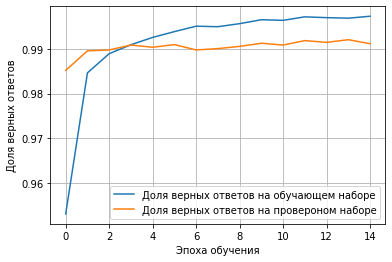

In [ ]:
# Обучение сеть на данных mnist
history = model.fit(x_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=15,
                    validation_data=(x_test, y_test),
                    verbose=1)

# Отображение графика точности обучения
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на провероном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Определение цифр из тестовой выборки
n = np.random.randint(x_test.shape[0])
prediction = model.predict(x_test)
print('Выход сети: ', prediction[n])
print('Распознанная цифра: ', np.argmax(prediction[n]))
print('Верный ответ: ', np.argmax(y_test[n]))

Выход сети:  [2.09336314e-18 1.06017435e-08 1.00000000e+00 5.34107090e-12
 1.92172314e-13 2.15391607e-24 3.33907125e-22 2.24871025e-10
 1.44520268e-12 1.77501226e-14]
Распознанная цифра:  2
Верный ответ:  2
